## L2 regularization for Neural Networks

Here you can find L2 regularization implementation and an empirical answer to [this question](https://stats.stackexchange.com/questions/287920/regularisation-why-multiply-by-1-2m) about why we divide L2 regularization cost by the number of training examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

Define our neural network class and helper functions for plotting.

In [2]:
class ANN:
  '''
  Artificial Neural Network class.
  It's uses xavier initialization, ReLU as non-linearity for all layers except
  the last (it uses sigmoid) and a cross-entropy loss function.
  '''
  
  def __init__(self, dims, lambd=0, reg_type=0):
    '''
    dims -- number of nodes for each layer.
    lambd -- lambda coefficient for L2 regularization.
    reg_type -- regularization type:
      0 -- L2 regularization cost without 1/m factor;
      1 -- with 1/m factor.
    '''
    np.random.seed(2)
    self.params = dict()
    self.L = len(dims) - 1
    self.m = len(Y)
    self.lambd = lambd
    self.reg_type = reg_type
    for i in range(1, self.L+1):
      self.params[f'W{i}'] = np.random.randn(dims[i], dims[i-1]) / np.sqrt(dims[i-1])
      self.params[f'b{i}'] = np.zeros((dims[i],1))
    
  def forward(self, X, Y=None):
    '''
    Forward propogation.
    '''
    self.X = X
    self.Y = Y
    self.cache = dict()
    self.cache['A0'] = X
    for i in range(1, self.L+1):
      self.cache[f'Z{i}'] = np.dot(self.params[f'W{i}'], self.cache[f'A{i-1}']) + self.params[f'b{i}']
      if i == self.L:
        self.cache[f'A{i}'] = 1 / (1 + np.exp(-self.cache[f'Z{i}']))
      else:
        self.cache[f'A{i}'] = np.maximum(self.cache[f'Z{i}'], 0)
    if Y is not None:
      self.J = -1/self.m * np.sum(np.log(self.cache[f'A{self.L}']) * Y + np.log(1 - self.cache[f'A{self.L}']) * (1 - Y))
      if self.reg_type == 0:
        for i in range(1, self.L+1):
          self.J += self.lambd/2 * np.sum(self.params[f'W{i}']**2)
      else:
        for i in range(1, self.L+1):
          self.J += 1/self.m * self.lambd/2 * np.sum(self.params[f'W{i}']**2)
    
  def backward(self):
    '''
    Backward propogation.
    '''
    for i in reversed(range(1, self.L+1)):
      if i == self.L:
        self.cache[f'dZ{i}'] = self.cache[f'A{i}'] - self.Y
      else:
        self.cache[f'dA{i}'] = np.dot(self.params[f'W{i+1}'].T, self.cache[f'dZ{i+1}'])
        self.cache[f'dZ{i}'] = np.multiply(self.cache[f'dA{i}'], np.int64(self.cache[f'A{i}'] > 0))
      self.cache[f'dW{i}'] = 1/self.m * np.dot(self.cache[f'dZ{i}'], self.cache[f'A{i-1}'].T)
      if self.reg_type == 0:
        self.cache[f'dW{i}'] += self.lambd * self.params[f'W{i}']
      else:
        self.cache[f'dW{i}'] += self.lambd/self.m * self.params[f'W{i}']
      self.cache[f'db{i}'] = 1/self.m * np.sum(self.cache[f'dZ{i}'], axis=1, keepdims=True)
  
  def predict(self, X):
    '''
    Make predictions.
    '''
    self.forward(X)
    return self.cache[f'A{self.L}'] > 0.5
  
  def update(self, alpha):
    '''
    Update weigths and biases.
    alpha -- leaning rate.
    '''
    for key,_ in self.params.items():
      self.params[key] -= self.cache[f'd{key}'] * alpha

      
######## Helper functions ########

def plot(X, Y):
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
  plt.show()
  
def plot_decision_boundary(model, X, Y):
  # Set min and max values and give it some padding
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
  plt.show()

Create a data. X is two dimensional (two cartesian coordinates), Y is one dimentional (zeros and ones representing each point's class).

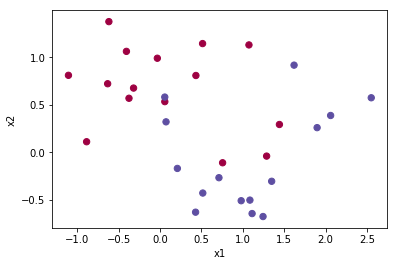

In [3]:
X, Y = make_moons(n_samples=30, noise=0.3, random_state=1)
X = X.T
plot(X, Y)

Create a neural network without regularization.

In [4]:
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0)

Train it for 30'000 epochs.

In [5]:
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")

Epoch 0: 0.6981566723644628
Epoch 3000: 0.3732285421139765
Epoch 6000: 0.28882061635734957
Epoch 9000: 0.18085991022708756
Epoch 12000: 0.10591036570738553
Epoch 15000: 0.08407509314612474
Epoch 18000: 0.07320760806485757
Epoch 21000: 0.0666640099849121
Epoch 24000: 0.062189393456109625
Epoch 27000: 0.05821394071140749
Epoch 30000: 0.054269817293922815


It's clearly overfitting.

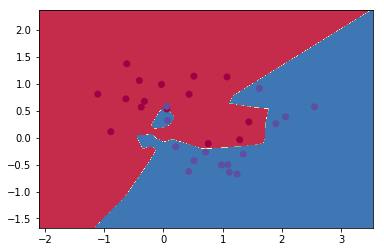

In [6]:
plot_decision_boundary(nn, X, Y)

Let's create the same neural network but now with regularization with lambda equal to 0.02 and **without** 1/*m* factor for L2 regularization cost.

In [7]:
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.02, reg_type=0)
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")

Epoch 0: 1.0467261090692976
Epoch 3000: 0.6466230572172408
Epoch 6000: 0.5392781283488379
Epoch 9000: 0.4931559972776928
Epoch 12000: 0.464024386519637
Epoch 15000: 0.43937433897815226
Epoch 18000: 0.41583168265279835
Epoch 21000: 0.39180553647263944
Epoch 24000: 0.36760093498910773
Epoch 27000: 0.3572305442495251
Epoch 30000: 0.3536554973938487


Looks like it's a good choice for lambda. The learned function looks more generalizable.

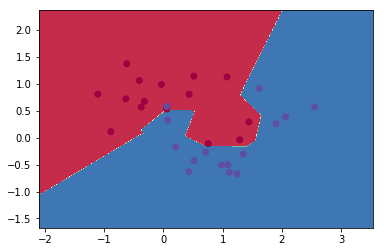

In [8]:
plot_decision_boundary(nn, X, Y)

Let's create more data!

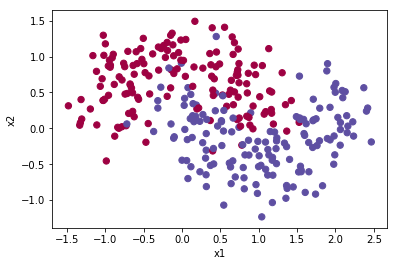

In [9]:
X, Y = make_moons(n_samples=300, noise=0.3, random_state=1)
X = X.T
plot(X, Y)

The same network and lambda but with more data (300 samples instead 30).

In [10]:
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.02, reg_type=0)
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")

Epoch 0: 1.0466834096813005
Epoch 3000: 0.6278479349445187
Epoch 6000: 0.527611981416236
Epoch 9000: 0.4793333112486245
Epoch 12000: 0.45309298329713293
Epoch 15000: 0.4391443888896943
Epoch 18000: 0.4310780573126307
Epoch 21000: 0.4260537354016716
Epoch 24000: 0.4226099011850324
Epoch 27000: 0.4198501761833455
Epoch 30000: 0.41723533566763205


As you can see the same lambda penalizes weights too much when there is more data.

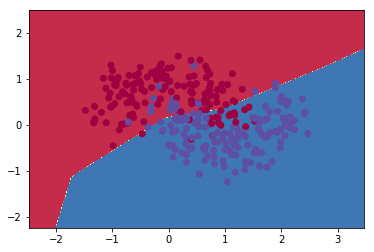

In [11]:
plot_decision_boundary(nn, X, Y)

So we need to reduce lambda ten times to make neural network to learn a good approximation function again.

Epoch 0: 0.7329709166469491
Epoch 3000: 0.4113244569667548
Epoch 6000: 0.37568268950858624
Epoch 9000: 0.34900586230087294
Epoch 12000: 0.305325606440779
Epoch 15000: 0.27181505602787276
Epoch 18000: 0.25437729007341936
Epoch 21000: 0.24719020434564762
Epoch 24000: 0.24286386626608225
Epoch 27000: 0.23978609675746185
Epoch 30000: 0.2372849070940785


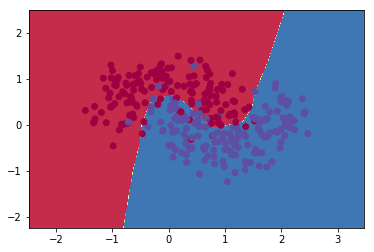

In [12]:
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.002, reg_type=0)
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")
plot_decision_boundary(nn, X, Y)

In contrast if we use the 1/*m* factor for L2 regularization cost, then there is no need to scale lambda when you use more data.

Epoch 0: 0.9886312029518253
Epoch 3000: 0.619977814715984
Epoch 6000: 0.5276541301442352
Epoch 9000: 0.4808506542432139
Epoch 12000: 0.44875831040356934
Epoch 15000: 0.41763004718203234
Epoch 18000: 0.39101051254441116
Epoch 21000: 0.35473996709568606
Epoch 24000: 0.3247511245074816
Epoch 27000: 0.31740949966972287
Epoch 30000: 0.3141782715721885


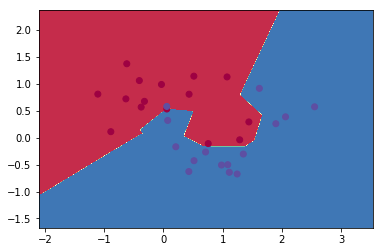

In [13]:
X, Y = make_moons(n_samples=30, noise=0.3, random_state=1)
X = X.T
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.5, reg_type=1)
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")
plot_decision_boundary(nn, X, Y)

The model and lambda are the same, just more data.

Epoch 0: 0.7271614260352018
Epoch 3000: 0.40525140458393344
Epoch 6000: 0.36979626417792033
Epoch 9000: 0.34253413481486067
Epoch 12000: 0.29760901150374625
Epoch 15000: 0.2670224757183988
Epoch 18000: 0.25051560238402315
Epoch 21000: 0.2424726102637515
Epoch 24000: 0.2383961062287678
Epoch 27000: 0.23547356082203422
Epoch 30000: 0.2330891403553218


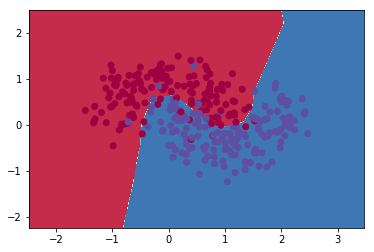

In [14]:
X, Y = make_moons(n_samples=300, noise=0.3, random_state=1)
X = X.T
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.5, reg_type=1)
for epoch in range(30000 + 1):
  nn.forward(X, Y)
  nn.backward()
  nn.update(0.005)
  if epoch % 3000 == 0:
    print(f"Epoch {epoch}: {nn.J}")
plot_decision_boundary(nn, X, Y)